<a href="https://colab.research.google.com/github/kjoonp/R_statistics/blob/master/R%EC%88%98%EC%97%8503_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#타이타닉 데이터 불러오기
titanic <- read.csv ('https://raw.githubusercontent.com/siestageek/R_statstics/master/datasets/titanic.csv')
head (titanic,10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
,<int>,<int>,<fct>,<fct>,<dbl>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
6,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
7,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
8,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
9,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S


In [ ]:
str(titanic) # 데이터 구조파악
summary(titanic) # 요약통계
colSums(is.na(titanic)) # 결측치 확인

'data.frame':	1310 obs. of  11 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ name    : Factor w/ 1308 levels "","Abbing, Mr. Anthony",..: 23 25 26 27 28 32 47 48 52 56 ...
 $ sex     : Factor w/ 3 levels "","female","male": 2 3 2 3 2 3 2 3 2 3 ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 930 levels "","110152","110413",..: 189 51 51 51 51 126 94 17 78 827 ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : Factor w/ 187 levels "","A10","A11",..: 45 81 81 81 81 151 147 17 63 1 ...
 $ embarked: Factor w/ 4 levels "","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...


     pclass         survived                                name     
 Min.   :1.000   Min.   :0.000   Connolly, Miss. Kate         :   2  
 1st Qu.:2.000   1st Qu.:0.000   Kelly, Mr. James             :   2  
 Median :3.000   Median :0.000                                :   1  
 Mean   :2.295   Mean   :0.382   Abbing, Mr. Anthony          :   1  
 3rd Qu.:3.000   3rd Qu.:1.000   Abbott, Master. Eugene Joseph:   1  
 Max.   :3.000   Max.   :1.000   Abbott, Mr. Rossmore Edward  :   1  
 NA's   :1       NA's   :1       (Other)                      :1302  
     sex           age              sibsp            parch      
       :  1   Min.   : 0.1667   Min.   :0.0000   Min.   :0.000  
 female:466   1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000  
 male  :843   Median :28.0000   Median :0.0000   Median :0.000  
              Mean   :29.8811   Mean   :0.4989   Mean   :0.385  
              3rd Qu.:39.0000   3rd Qu.:1.0000   3rd Qu.:0.000  
              Max.   :80.0000   Max.   :8.0000   M

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        0        0      264        1        1        0 
    fare    cabin embarked 
       2        0        0

In [ ]:
colSums(is.na(titanic)) # 결측치 확인

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        0        0      264        1        1        0 
    fare    cabin embarked 
       2        0        0

In [ ]:
# 결측치 처리 1 - 제거
# 결측치 제거 : na.omit()
titanic2 <- na.omit(titanic)
colSums (is.na(titanic2))

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0        0        0        0        0 
    fare    cabin embarked 
       0        0        0

In [ ]:
# 결측치 처리 2 - 대체값
# age의 결측치는 중앙값으로 대체
# 소수점 이하 처리 : round, floor (내림), ceil(올림)
mv <- floor(median(titanic$age, na.rm=T))
mv 

[1] 28

In [ ]:
# titanic$age[]  <- mv # 모든 나이컬럼에 중앙값 대입은 안됨
is.na(titanic$age) #age컬럼의 결측치 여부 확인

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [13] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [37] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
  [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
  [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
  [73] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
  [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
 [109]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [121] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [133] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [145] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [157] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
 [181] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [193] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [205]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [217] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE
 [241] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [253] FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [265] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [277] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE
 [289] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
 [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [313] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE
 [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [361] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [385]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [409] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [469] FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
 [481] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [493] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE
 [529]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [577] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE
 [601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALS

In [ ]:
 titanic$age[ is.na(titanic$age)] <- mv  #age 컬럼에 결측치가 포함된 항목을 찾아서 중앙값 대체
 colSums(is.na(titanic))  # 중앙값 대체후 결측치 확인

pclass survived     name      sex      age    sibsp    parch   ticket 
       1        1        0        0        0        1        1        0 
    fare    cabin embarked 
       2        0        0

In [ ]:
titanic3 <- na.omit(titanic)  #나머지 결측치 제거
colSums(is.na(titanic3))

pclass survived     name      sex      age    sibsp    parch   ticket 
       0        0        0        0        0        0        0        0 
    fare    cabin embarked 
       0        0        0

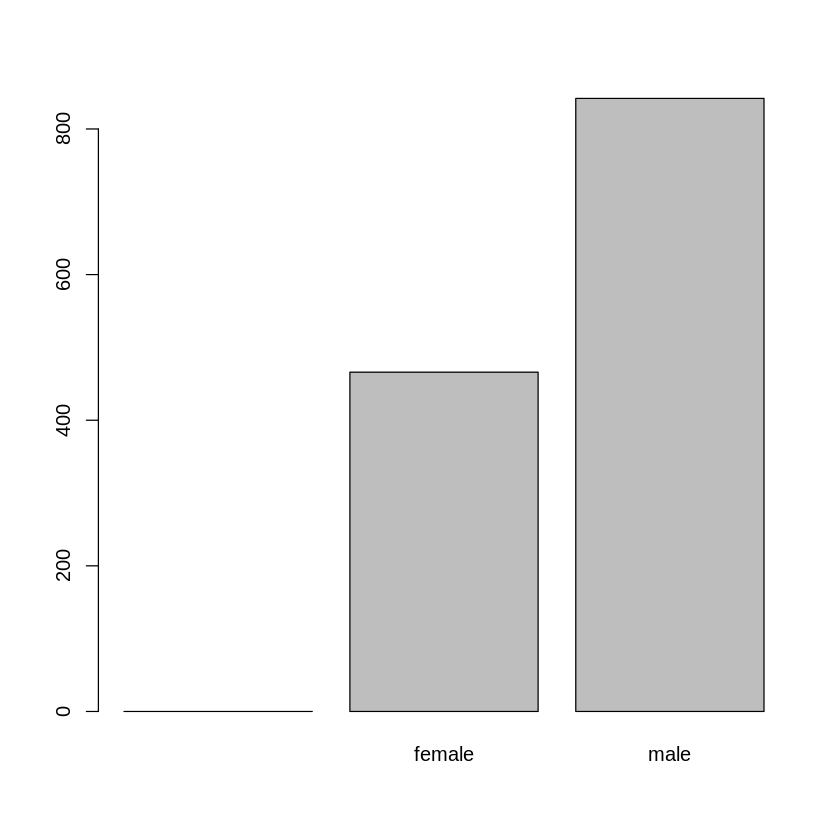

In [ ]:
frq_gdr <- table(titanic3$sex)
barplot(frq_gdr)   # 여전히 결측치 있음

In [ ]:
# read.csv 알아보기
# csv로 작성된 파일을 R로 읽어 들일때 사용
#read.csv ('파일경로', 헤더여부, 구분자, 결측치처리, 인코딩 )
# read.csv('', header=f, sep=',', encoding='euc-kr' ) 한글 읽을때
# na.strings=''
titanic <- read.csv('https://raw.githubusercontent.com/siestageek/R_statstics/master/datasets/titanic.csv' , na.strings='') # 빈문자 na로 대체

In [ ]:
str(titanic)

'data.frame':	1310 obs. of  11 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ name    : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 22 24 25 26 27 31 46 47 51 55 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 929 levels "110152","110413",..: 188 50 50 50 50 125 93 16 77 826 ...
 $ fare    : num  211 152 152 152 152 ...
 $ cabin   : Factor w/ 186 levels "A10","A11","A14",..: 44 80 80 80 80 150 146 16 62 NA ...
 $ embarked: Factor w/ 3 levels "C","Q","S": 3 3 3 3 3 3 3 3 3 1 ...


In [ ]:
mev <- floor(mean(titanic$age, na.rm=T))
mev
titanic$age[is.na(titanic$age)] <- mev

[1] 29

In [ ]:
titanic <- na.omit(titanic)

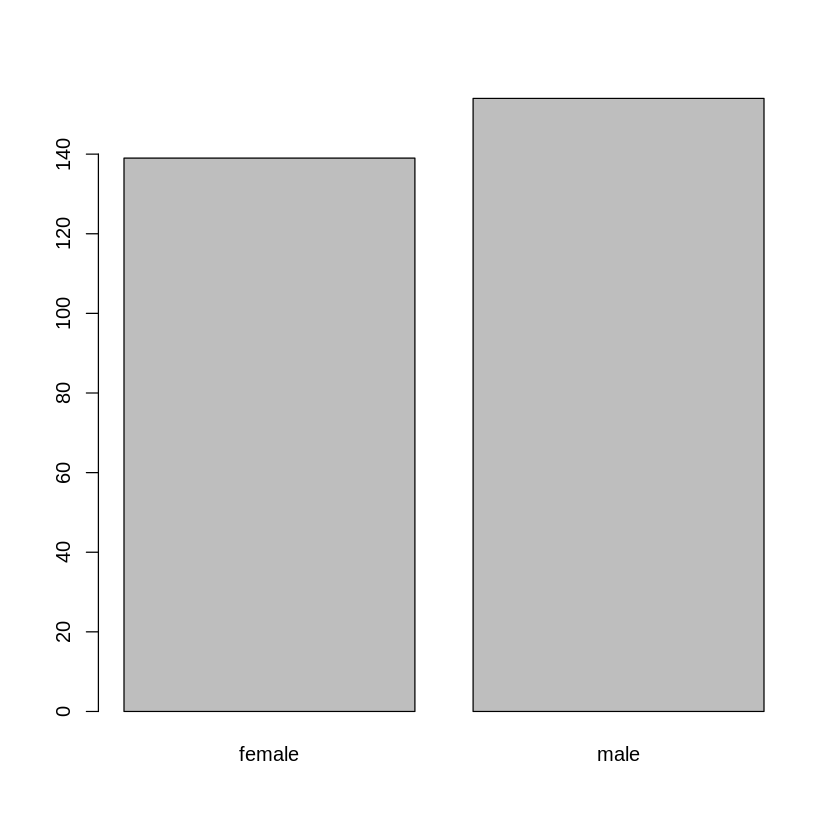

In [ ]:
frq_gdr <- table(titanic$sex)
barplot(frq_gdr)

In [ ]:
# 작업한 내용을 파일로 저장하기
# write.csv('저장경로',  row.names=F) : csv 파일로 저장
# save(객체, '저장경로') : R용 datat 파일로 저장
write.csv(titanic, 'titanic.csv', row.names=F)   #타이타닉 데이터프레임을 titanic.csv 파일로 저장

In [ ]:
write.csv(titanic, 'titanic.csv', row.names=F)

In [ ]:
save(titanic,file='titanic.rdata')  # R전용 데이터로 저장

In [ ]:
# 우편번호 데이터 읽어보기
zipcode <- read.csv('https://raw.githubusercontent.com/kjoonp/R_statistics/master/zipcode_2013.txt', sep='\t')
head(zipcode,15)

,ZIPCODE,SIDO,GUGUN,DONG,RI,BUNJI,SEQ
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,135-806,서울,강남구,개포1동,경남아파트,,1
2,135-807,서울,강남구,개포1동,우성3차아파트,(1∼6동),2
3,135-806,서울,강남구,개포1동,우성9차아파트,(901∼902동),3
4,135-770,서울,강남구,개포1동,주공아파트,(1∼16동),4
5,135-805,서울,강남구,개포1동,주공아파트,(17∼40동),5
6,135-966,서울,강남구,개포1동,주공아파트,(41∼85동),6
7,135-807,서울,강남구,개포1동,주공아파트,(86∼103동),7
8,135-805,서울,강남구,개포1동,주공아파트,(104∼125동),8
9,135-807,서울,강남구,개포1동,현대1차아파트,(101∼106동),9


In [ ]:
zip <- na.omit(zipcode)
head(zip, 15)

,ZIPCODE,SIDO,GUGUN,DONG,RI,BUNJI,SEQ
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,135-806,서울,강남구,개포1동,경남아파트,,1
2,135-807,서울,강남구,개포1동,우성3차아파트,(1∼6동),2
3,135-806,서울,강남구,개포1동,우성9차아파트,(901∼902동),3
4,135-770,서울,강남구,개포1동,주공아파트,(1∼16동),4
5,135-805,서울,강남구,개포1동,주공아파트,(17∼40동),5
6,135-966,서울,강남구,개포1동,주공아파트,(41∼85동),6
7,135-807,서울,강남구,개포1동,주공아파트,(86∼103동),7
8,135-805,서울,강남구,개포1동,주공아파트,(104∼125동),8
9,135-807,서울,강남구,개포1동,현대1차아파트,(101∼106동),9


In [ ]:
zipcode2 <- read.csv('https://raw.githubusercontent.com/kjoonp/R_statistics/master/zipcode_2013.txt', sep='\t', na.strings='')
head(zipcode2, 15)
colSums(is.na(zipcode2))

,ZIPCODE,SIDO,GUGUN,DONG,RI,BUNJI,SEQ
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,135-806,서울,강남구,개포1동,경남아파트,NA,1
2,135-807,서울,강남구,개포1동,우성3차아파트,(1∼6동),2
3,135-806,서울,강남구,개포1동,우성9차아파트,(901∼902동),3
4,135-770,서울,강남구,개포1동,주공아파트,(1∼16동),4
5,135-805,서울,강남구,개포1동,주공아파트,(17∼40동),5
6,135-966,서울,강남구,개포1동,주공아파트,(41∼85동),6
7,135-807,서울,강남구,개포1동,주공아파트,(86∼103동),7
8,135-805,서울,강남구,개포1동,주공아파트,(104∼125동),8
9,135-807,서울,강남구,개포1동,현대1차아파트,(101∼106동),9


ZIPCODE    SIDO   GUGUN    DONG      RI   BUNJI     SEQ 
      0       0     186       0   20489   31541       0

In [ ]:
# 사원 데이터 읽어오기
empl <- read.csv('https://raw.githubusercontent.com/kjoonp/R_statistics/master/dataset_4', na.strings = '')
head(empl, 15)
colSums(is.na(empl))

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>
1,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000,NA,NA,90
2,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000,NA,100,90
3,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000,NA,100,90
4,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000,NA,102,60
5,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000,NA,103,60
6,105,David,Austin,DAUSTIN,590.423.4569,2005-06-25,IT_PROG,4800,NA,103,60
7,106,Valli,Pataballa,VPATABAL,590.423.4560,2006-02-05,IT_PROG,4800,NA,103,60
8,107,Diana,Lorentz,DLORENTZ,590.423.5567,2007-02-07,IT_PROG,4200,NA,103,60
9,108,Nancy,Greenberg,NGREENBE,515.124.4569,2002-08-17,FI_MGR,12008,NA,101,100


EMPLOYEE_ID     FIRST_NAME      LAST_NAME          EMAIL   PHONE_NUMBER 
             0              0              0              0              0 
     HIRE_DATE         JOB_ID         SALARY COMMISSION_PCT     MANAGER_ID 
             0              0              0             72              1 
 DEPARTMENT_ID 
             1

In [ ]:
tail(empl,10)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>
98,197,Kevin,Feeney,KFEENEY,650.507.9822,2006-05-23,SH_CLERK,3000,NA,124,50
99,198,Donald,OConnell,DOCONNEL,650.507.9833,2007-06-21,SH_CLERK,2600,NA,124,50
100,199,Douglas,Grant,DGRANT,650.507.9844,2008-01-13,SH_CLERK,2600,NA,124,50
101,200,Jennifer,Whalen,JWHALEN,515.123.4444,2003-09-17,AD_ASST,4400,NA,101,10
102,201,Michael,Hartstein,MHARTSTE,515.123.5555,2004-02-17,MK_MAN,13000,NA,100,20
103,202,Pat,Fay,PFAY,603.123.6666,2005-08-17,MK_REP,6000,NA,201,20
104,203,Susan,Mavris,SMAVRIS,515.123.7777,2002-06-07,HR_REP,6500,NA,101,40
105,204,Hermann,Baer,HBAER,515.123.8888,2002-06-07,PR_REP,10000,NA,101,70
106,205,Shelley,Higgins,SHIGGINS,515.123.8080,2002-06-07,AC_MGR,12008,NA,101,110


In [ ]:
#수당이 없는 사원을 대상으로 NA=0 으로 변경)
cnd <-  is.na(empl$COMMISSION_PCT)
empl$COMMISSION_PCT[cnd] <- 0
head(empl, 10)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>
1,100,Steven,King,SKING,515.123.4567,2003-06-17,AD_PRES,24000,0,NA,90
2,101,Neena,Kochhar,NKOCHHAR,515.123.4568,2005-09-21,AD_VP,17000,0,100,90
3,102,Lex,De Haan,LDEHAAN,515.123.4569,2001-01-13,AD_VP,17000,0,100,90
4,103,Alexander,Hunold,AHUNOLD,590.423.4567,2006-01-03,IT_PROG,9000,0,102,60
5,104,Bruce,Ernst,BERNST,590.423.4568,2007-05-21,IT_PROG,6000,0,103,60
6,105,David,Austin,DAUSTIN,590.423.4569,2005-06-25,IT_PROG,4800,0,103,60
7,106,Valli,Pataballa,VPATABAL,590.423.4560,2006-02-05,IT_PROG,4800,0,103,60
8,107,Diana,Lorentz,DLORENTZ,590.423.5567,2007-02-07,IT_PROG,4200,0,103,60
9,108,Nancy,Greenberg,NGREENBE,515.124.4569,2002-08-17,FI_MGR,12008,0,101,100
